# Practical: Multi-Layer Perceptron (MLP) for Classification

## Aim
To implement and evaluate a Multi-Layer Perceptron neural network for classification using a real dataset.

## Theory
A Multi-Layer Perceptron (MLP) is a feedforward neural network consisting of input, hidden, and output layers. Nonlinear activation functions allow the network to model complex decision boundaries. Training is performed using backpropagation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset shape:", X.shape)

Dataset shape: (569, 30)


## Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train MLP Model

In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)

- `hidden_layer_sizes=(16, 8)`: This parameter defines the architecture of the hidden layers. It means the neural network will have two hidden layers: the first with 16 neurons and the second with 8 neurons.
- `activation='relu'`: This specifies the activation function for the hidden layers. 'relu' (Rectified Linear Unit) is a common choice that helps the network learn complex patterns.
- `solver='adam'`: This sets the optimization algorithm used for weight optimization. 'adam' is an efficient stochastic gradient-based optimizer.
- `max_iter=1000`: This is the maximum number of iterations (epochs) the solver will run. The network will train for at most 1000 epochs, or until the convergence criterion is met.
- `random_state=42`: This parameter is used for reproducibility. Setting a specific random state ensures that the same initial weights and biases are generated each time the code runs, leading to consistent results.

## Predictions

In [6]:
y_pred = mlp.predict(X_test)

## Evaluation

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
 [[41  2]
 [ 2 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## Training Loss Curve

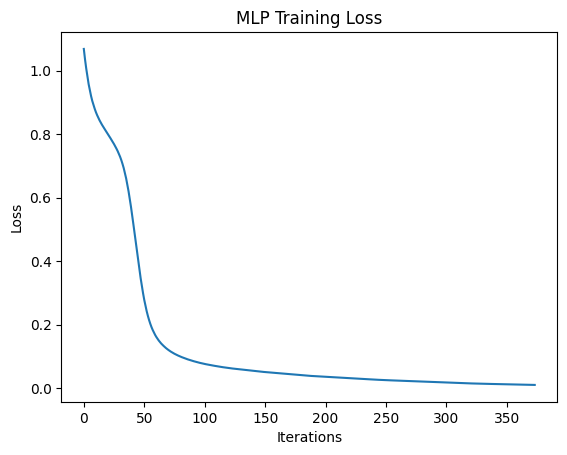

In [8]:
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Observation
The MLP captures nonlinear patterns and improves classification performance.

## Conclusion
Multi-Layer Perceptron effectively models complex relationships using hidden layers and backpropagation.